In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Read files:
train = pd.read_excel(r"C:\Users\PRATIK PANIGRAHI\Desktop\Final_Train.xlsx")
test = pd.read_excel(r"C:\Users\PRATIK PANIGRAHI\Desktop\Final_Test.xlsx")

# Data Exploration

In [44]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [45]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [46]:
train.shape,test.shape

((5961, 7), (1987, 6))

In [47]:
train.isnull().mean()

Qualification         0.000000
Experience            0.000000
Rating                0.553934
Place                 0.004194
Profile               0.000000
Miscellaneous_Info    0.439524
Fees                  0.000000
dtype: float64

In [48]:
test.isnull().mean()

Qualification         0.000000
Experience            0.000000
Rating                0.548566
Place                 0.003020
Profile               0.000000
Miscellaneous_Info    0.419728
dtype: float64

Here ,We can see in both train and test data in attribute "Rating" having nearly about more than 50% null value.so it's better to drop that columns for better evaluation.

# Feature Selection

In [49]:
train.drop('Rating',axis=1,inplace=True)

In [50]:
train.drop('Miscellaneous_Info',axis=1,inplace=True)

In [51]:
train.shape

(5961, 5)

In [52]:
test.drop('Rating',axis=1,inplace=True)

In [53]:
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [54]:
test.shape

(1987, 4)

# Label Encoding

In [58]:
train.columns

Index(['Qualification', 'Experience', 'Place', 'Profile', 'Fees'], dtype='object')

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
list1=['Qualification', 'Experience', 'Place', 'Profile']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))

In [60]:
train.head()

,Qualification,Experience,Place,Profile,Fees
0,401,16,299,5,100
1,73,3,866,0,350
2,1135,63,457,3,300
3,464,3,68,0,250
4,10,12,337,0,250


In [61]:
test.columns

Index(['Qualification', 'Experience', 'Place', 'Profile'], dtype='object')

In [62]:
list2=['Qualification', 'Experience', 'Place', 'Profile']
for val in list1:
    test[val]=le.fit_transform(test[val].astype(str))

In [63]:
test.head()

,Qualification,Experience,Place,Profile
0,241,28,142,4
1,340,24,580,3
2,258,34,212,2
3,6,0,374,0
4,79,7,231,1


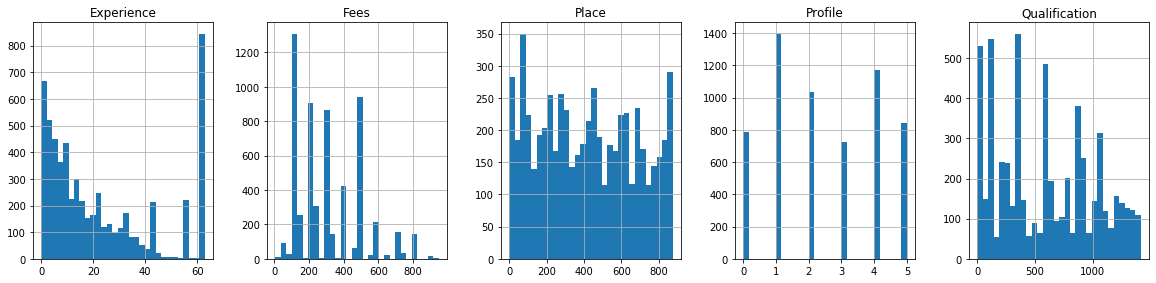

In [65]:
train.hist(figsize=(20,10),grid=True,layout=(2,5),bins=30)
plt.show()

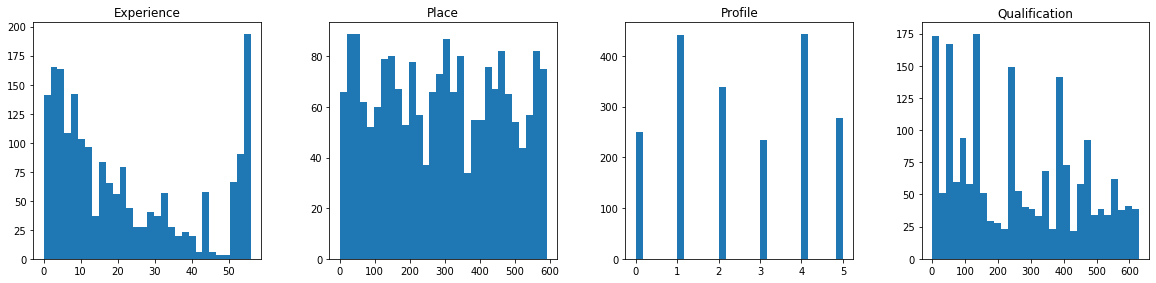

In [66]:
test.hist(figsize=(20,10),grid=False,layout=(2,4),bins=30)
plt.show()

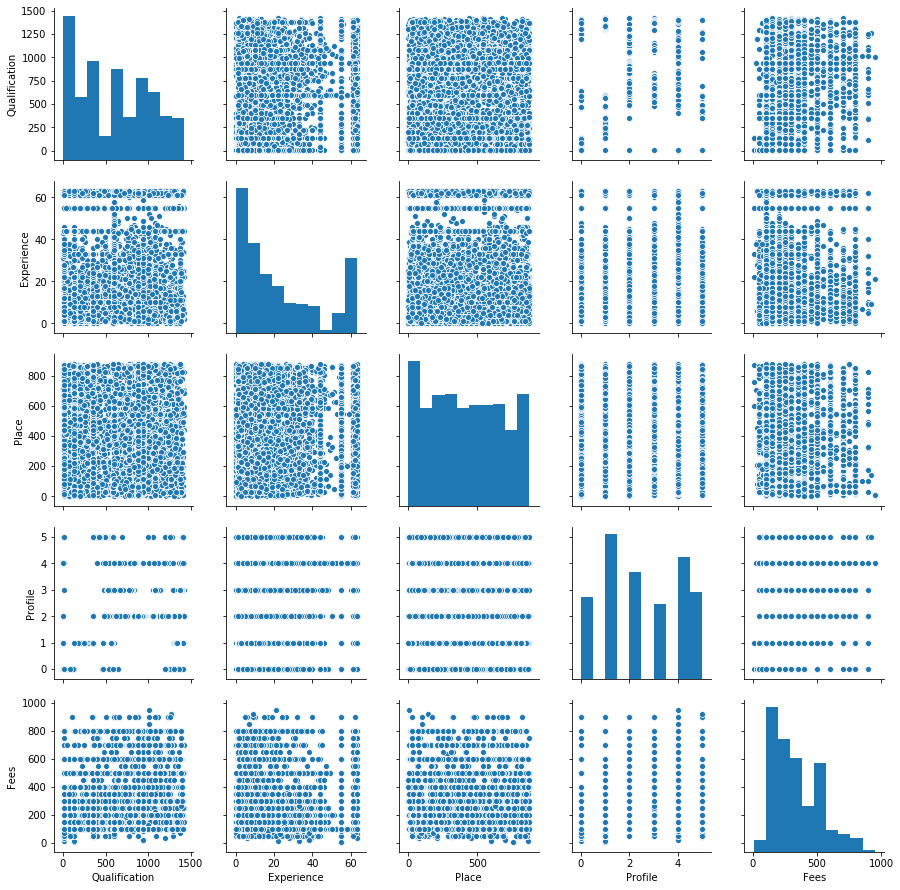

In [81]:
sns.pairplot(train)

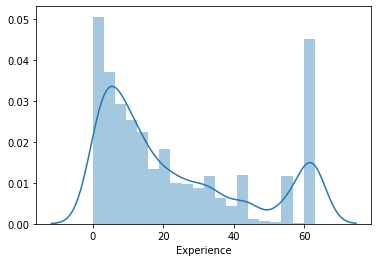

In [67]:
sns.distplot(train['Experience'])

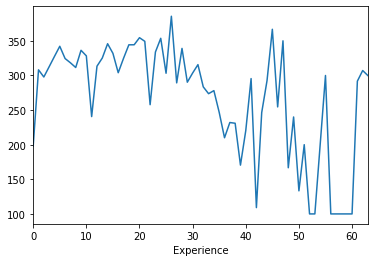

In [74]:
train.groupby('Experience')['Fees'].mean().plot.line()

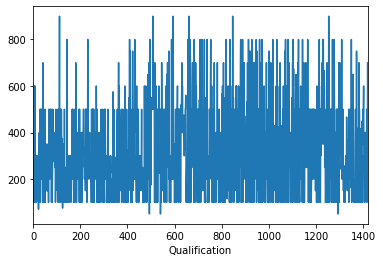

In [76]:
train.groupby('Qualification')['Fees'].mean().plot.line()

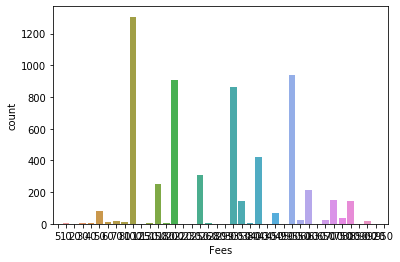

In [77]:
sns.countplot(x="Fees", data= train)

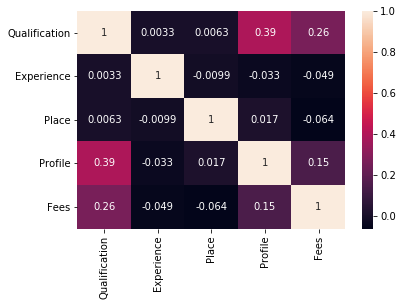

In [78]:
sns.heatmap(train.corr(),annot = True)
plt.show()

In [ ]:
x.predict(x_test)

In [79]:
#creating a target col in test data
test["Fees"] = ""

In [82]:
test.columns

Index(['Qualification', 'Experience', 'Place', 'Profile', 'Fees'], dtype='object')

In [83]:
x_train=train.drop('Fees',axis=1)
y_train=train['Fees']
x_test=test.drop('Fees',axis=1)
y_test=test['Fees']

In [108]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5961, 4)
(5961,)
(1987, 4)
(1987,)


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [86]:
# modeling utilities
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [87]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [88]:
dtr.score(x_train, y_train)

0.1418559173891809

# Grid Search CV

In [89]:
param_grid = {"criterion": ["mse", "mae"]
                 }

In [90]:
dtr= DecisionTreeRegressor()

In [91]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [103]:
grid_cv_dtr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'criterion': ['mse', 'mae']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::-0.4484592813701294
Best Hyperparameters::
{'criterion': 'mae'}


In [94]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

In [95]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::-0.4953055480210102
MSE::-53752.647069519866


In [96]:
grid_cv_dtr.score(x_train,y_train)

0.8274556972598848

In [97]:
#model saving
from sklearn.externals import joblib

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [98]:
joblib.dump(grid_cv_dtr, "Project33_doctor fee.pkl")

['Project33_doctor fee.pkl']

In [106]:
x= joblib.load("Project32_flight ticket.pkl")